In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
import seaborn as sns
import matplotlib.pyplot as plt

import random
random.seed(42)
pd.set_option('display.max_columns', None)

In [2]:
credits = pd.read_csv('movies/tmdb_5000_credits.csv', index_col='movie_id')
movies = pd.read_csv('movies/tmdb_5000_movies.csv', index_col='id')

data = pd.merge(movies, credits)
data.shape

(4809, 21)

In [3]:
data.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [4]:
data = data.loc[data['revenue'] != 0]
data['revenue'].dropna(inplace=True)
data.shape

(3379, 21)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['revenue'], axis=1), data['revenue']) 

In [6]:
exploratory = X_train.copy()

In [7]:
exploratory.shape

(2534, 20)

# 1. EDA & Data transformation


## 1.1 Checking missing values

In [8]:
nan_percent = exploratory.isna().mean()*100
nan_count = exploratory.isna().sum()
pd.concat([nan_count.rename('missing_count'), nan_percent.round().rename('missing_percent')], axis=1)

,missing_count,missing_percent
budget,0,0.0
genres,0,0.0
homepage,1475,58.0
keywords,0,0.0
original_language,0,0.0
original_title,0,0.0
overview,0,0.0
popularity,0,0.0
production_companies,0,0.0
production_countries,0,0.0


In [9]:
# TODO IMPUTERS

In [10]:
columns_to_drop = ['original_title', 'overview', 'tagline', 'title']
exploratory = exploratory.drop(columns_to_drop, axis=1)

In [11]:
exploratory.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2534 entries, 226 to 1541
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                2534 non-null   int64  
 1   genres                2534 non-null   object 
 2   homepage              1059 non-null   object 
 3   keywords              2534 non-null   object 
 4   original_language     2534 non-null   object 
 5   popularity            2534 non-null   float64
 6   production_companies  2534 non-null   object 
 7   production_countries  2534 non-null   object 
 8   release_date          2534 non-null   object 
 9   runtime               2534 non-null   float64
 10  spoken_languages      2534 non-null   object 
 11  status                2534 non-null   object 
 12  vote_average          2534 non-null   float64
 13  vote_count            2534 non-null   int64  
 14  cast                  2534 non-null   object 
 15  crew                  25

In [12]:
# discrete_thrshld = 10
# discrete = [attr for attr in exploratory.columns if exploratory[attr].dtype != 'O' and exploratory[attr].nunique() < discrete_thrshld]
# continuous = [attr for attr in exploratory.columns if exploratory[attr].dtype != 'O' and attr not in discrete]
# categorical = [attr for attr in exploratory.columns if exploratory[attr].dtype == 'O']

-    ratio - it's a numerical scale with absolute zero, for example, age;
-    interval - it's also a numerical scale, but without absolute zero, as it is the case for Fahrenheit scale. For temperature measurement Kelvin would be a ratio scale;
-    ordinal - which is not present in our data set, refers to measurements you can put in order, but you cannot tell the quantitive difference between adjacent measurements;
-    nominal - in this scale each item is treated as having the same quality, for example, city names;

In [13]:
dtypes_description = pd.Series(['ratio', 'nominal', 'nominal', 'nominal', 'nominal', 'ratio', 'nominal', 'nominal', \
                     'interval', 'ratio', 'nominal', 'nominal', 'ratio', 'ratio', 'nominal', 'nominal'], \
                     index=exploratory.dtypes.index)
dtypes_description

budget                     ratio
genres                   nominal
homepage                 nominal
keywords                 nominal
original_language        nominal
popularity                 ratio
production_companies     nominal
production_countries     nominal
release_date            interval
runtime                    ratio
spoken_languages         nominal
status                   nominal
vote_average               ratio
vote_count                 ratio
cast                     nominal
crew                     nominal
dtype: object

In [14]:
pd.concat([exploratory.dtypes.rename('dtype'), exploratory.iloc[420].rename('example'), dtypes_description.rename('description')], axis=1)

,dtype,example,description
budget,int64,28000000,ratio
genres,object,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",nominal
homepage,object,NaN,nominal
keywords,object,"[{""id"": 616, ""name"": ""witch""}, {""id"": 3335, ""n...",nominal
original_language,object,en,nominal
popularity,float64,18.650748,ratio
production_companies,object,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",nominal
production_countries,object,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",nominal
release_date,object,1993-07-16,interval
runtime,float64,96.0,ratio


In [15]:
exploratory.dtypes

budget                    int64
genres                   object
homepage                 object
keywords                 object
original_language        object
popularity              float64
production_companies     object
production_countries     object
release_date             object
runtime                 float64
spoken_languages         object
status                   object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object

## 1.2 Nominal data

### 1.2.1 Dummifying
For most of the data coming in the form of a list of dictionaries, we'll simply extract fields that interest us, and dummify them. In some cases, to avoid sparsification, we'll choose some fraction of the most occurring values.

Columns to dummify:

**genres, keywords, production_companies, production_countries, crew**

In [16]:
exploratory[['genres', 'spoken_languages', 'crew']].head()

,genres,spoken_languages,crew
226,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""credit_id"": ""52fe4620c3a36847f80ee48d"", ""de..."
1211,"[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""n...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""credit_id"": ""52fe4d66c3a368484e1e70f3"", ""de..."
4090,"[{""id"": 18, ""name"": ""Drama""}]","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""credit_id"": ""52fe4297c3a36847f802a9ad"", ""de..."
4183,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""credit_id"": ""52fe430ec3a36847f8037183"", ""de..."
399,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""credit_id"": ""52fe447fc3a36847f8099b9b"", ""de..."


In [17]:
exploratory.genres.iloc[0]

'[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]'

In [18]:
exploratory.crew.iloc[0][:300]

'[{"credit_id": "52fe4620c3a36847f80ee48d", "department": "Directing", "gender": 2, "id": 3388, "job": "Director", "name": "James L. Brooks"}, {"credit_id": "52fe4621c3a36847f80ee4a9", "department": "Production", "gender": 2, "id": 3388, "job": "Producer", "name": "James L. Brooks"}, {"credit_id": "5'

In [19]:
exploratory.spoken_languages.iloc[1]

'[{"iso_639_1": "en", "name": "English"}]'

### 1.2.2 Binarization
Here we'll simple binarize the data - the column will get label True or False (or 1 or 0) on certain, established condition.

Columns to binarize:

**homepage, original_language, status, spoken_languages**

In [20]:
exploratory.original_language.unique()

array(['en', 'el', 'es', 'ru', 'fr', 'zh', 'fa', 'cn', 'te', 'vi', 'hi',
       'ja', 'it', 'de', 'no', 'is', 'nl', 'ko', 'th', 'pt', 'he', 'da',
       'af', 'id', 'ro', 'pl', 'nb'], dtype=object)

In [21]:
exploratory.original_language.isna().sum()

0

In [22]:
exploratory.status.unique()

array(['Released', 'Post Production'], dtype=object)

In [23]:
exploratory.status.isna().sum()

0

In [24]:
exploratory[['homepage', 'original_language', 'status']].head()

,homepage,original_language,status
226,http://www.howdoyouknow-movie.com/,en,Released
1211,NaN,en,Released
4090,NaN,en,Released
4183,NaN,en,Released
399,http://www.sonypictures.com/movies/openseason/,en,Released


### 1.2.3 Counts
As an example, we'll count how many popular actors (having most appearances) are cast in a movie. Perhaps the more of them playing in one movie, the higher is the revenue...

In [25]:
exploratory['cast'].head().to_frame()

,cast
226,"[{""cast_id"": 2, ""character"": ""Lisa Jorgenson"",..."
1211,"[{""cast_id"": 5, ""character"": ""Angelo \u201cGyp..."
4090,"[{""cast_id"": 15, ""character"": ""Eddie Felson"", ..."
4183,"[{""cast_id"": 11, ""character"": ""Caesar"", ""credi..."
399,"[{""cast_id"": 7, ""character"": ""Boog (voice)"", ""..."


In [26]:
exploratory.cast.iloc[0]

'[{"cast_id": 2, "character": "Lisa Jorgenson", "credit_id": "52fe4620c3a36847f80ee491", "gender": 1, "id": 368, "name": "Reese Witherspoon", "order": 0}, {"cast_id": 4, "character": "George", "credit_id": "52fe4621c3a36847f80ee499", "gender": 2, "id": 22226, "name": "Paul Rudd", "order": 1}, {"cast_id": 3, "character": "Manny", "credit_id": "52fe4621c3a36847f80ee495", "gender": 2, "id": 887, "name": "Owen Wilson", "order": 2}, {"cast_id": 5, "character": "Charles", "credit_id": "52fe4621c3a36847f80ee49d", "gender": 2, "id": 514, "name": "Jack Nicholson", "order": 3}, {"cast_id": 14, "character": "Annie", "credit_id": "52fe4621c3a36847f80ee4cb", "gender": 1, "id": 17696, "name": "Kathryn Hahn", "order": 4}, {"cast_id": 15, "character": "Coach Sally", "credit_id": "52fe4621c3a36847f80ee4cf", "gender": 1, "id": 150972, "name": "Molly Price", "order": 5}, {"cast_id": 17, "character": "Terry", "credit_id": "52fe4621c3a36847f80ee4d7", "gender": 1, "id": 73707, "name": "Shelley Conn", "order

### 1.2.4. Date Extraction

In this data set, we have release_date in a string form. Probably it will be better if we extract from it: year, month and day, and dummify the latter two.


In [27]:
exploratory['release_date'].head().to_frame()

,release_date
226,2010-12-17
1211,2014-06-05
4090,1961-09-25
4183,1973-06-15
399,2006-09-29


## 1.3 Nominal Data Transformation
### 1.3.1 Feature selector
This transformer is really straightforward - it simply takes the name of the column we want to extract and if we use it, it will 'spit out' the data column of our Data Frame.

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

In [29]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        return X[self.feature_names]

In [30]:
prod_companies = FeatureSelector('production_companies').fit_transform(exploratory)
prod_companies.to_frame().head()

,production_companies
226,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam..."
1211,"[{""name"": ""Warner Bros."", ""id"": 6194}]"
4090,"[{""name"": ""Twentieth Century Fox Film Corporat..."
4183,"[{""name"": ""Twentieth Century Fox Film Corporat..."
399,"[{""name"": ""Sony Pictures Animation"", ""id"": 2251}]"


In [31]:
prod_companies.iloc[0]

'[{"name": "Columbia Pictures", "id": 5}, {"name": "Gracie Films", "id": 18}, {"name": "Road Rebel", "id": 2648}]'

### 1.3.2 Dictionary vectorizer
This one is a bit more complex. It's role is to:

- 1st - extract values from dictionaries,
- 2nd - join them in one string,
- 3rd - dummify it using sklearn Count Vectorizer.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
import re

def extract_items(list_, key, all_=True):
    sub = lambda x: re.sub(r'[^A-Za-z0-9]', '_', x)
    if all_:
        target = []
        for dict_ in eval(list_):
            target.append(sub(dict_[key].strip()))
        return ' '.join(target)
    elif not eval(list_): # ?
        return 'no_data'
    else:
        return sub(eval(list_)[0][key].strip())

class DictionaryVectorizer(BaseEstimator, TransformerMixin):
    
    def __init__(self, key, all_=True): # all_ ?
        self.key = key
        self.all = all_
    
    def fit(self, X, y=None):
        genres = X.apply(lambda x: extract_items(x, self.key, self.all)) # names of values that correspond to key in dict
        # print(genres) # -> pd.series X.idx: "val1 val2 ... valn"
        self.vectorizer = CountVectorizer().fit(genres)  # similar to tokenizer - bag of words         
        self.columns = self.vectorizer.get_feature_names_out()
        return self
        
    def transform(self, X):
        genres = X.apply(lambda x: extract_items(x, self.key)) # why not all
        data = self.vectorizer.transform(genres)
        return pd.DataFrame(data.toarray(), columns=self.vectorizer.get_feature_names_out(), index=X.index)

In [33]:
prod_companies_vectorized = DictionaryVectorizer('name').fit_transform(prod_companies)
prod_companies_vectorized

100_bares  10th_hole_productions  120_films  1492_pictures  \
226           0                      0          0              0   
1211          0                      0          0              0   
4090          0                      0          0              0   
4183          0                      0          0              0   
399           0                      0          0              0   
...         ...                    ...        ...            ...   
840           0                      0          0              0   
3780          0                      0          0              0   
827           0                      0          0              0   
2184          0                      0          0              0   
1541          0                      0          0              0   

      16_block_productions  1818  1821_pictures  \
226                      0     0              0   
1211                     0     0              0   
4090                     0     0              0   
4183                     0     0              0   
399                      0     0              0   
...                    ...   ...            ...   
840                      0     0              0   
3780                     0     0              0   
827                      0     0              0   
2184                     0     0              0   
1541                     0     0              0   

      1984_private_defense_contractors  19_entertainment  1_85_films  \
226                                  0                 0           0   
1211                                 0                 0           0   
4090                                 0                 0           0   
4183                                 0                 0           0   
399                                  0                 0           0   
...                                ...               ...         ...   
840                                  0                 0           0   
3780                                 0                 0           0   
827                                  0                 0           0   
2184                                 0                 0           0   
1541                                 0                 0           0   

      20th_century_fox_home_entertainment  20th_century_fox_russia  \
226                                     0                        0   
1211                                    0                        0   
4090                                    0                        0   
4183                                    0                        0   
399                                     0                        0   
...                                   ...                      ...   
840                                     0                        0   
3780                                    0                        0   
827                                     0                        0   
2184                                    0                        0   
1541                                    0                        0   

      21_laps_entertainment  26_films  2929_productions  2_entertain  \
226                       0         0                 0            0   
1211                      0         0                 0            0   
4090                      0         0                 0            0   
4183                      0         0                 0            0   
399                       0         0                 0            0   
...                     ...       ...               ...          ...   
840                       0         0                 0            0   
3780                      0         0                 0            0   
827                       0         0                 0            0   
2184                      0         0                 0            0   
1541                      0         0                 0            0   

     

### 1.3.3 Top features
This transformer expects dummified data set and extract most popular features.

In [34]:
class TopFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self, percent): # TODO quantity or percent
        if percent > 100:
            self.percent = 100
        else:
            self.percent = percent
    
    def fit(self, X, y=None):
        counts = X.sum().sort_values(ascending=False)
        index_ = int(counts.shape[0]*self.percent/100)
        self.columns = counts[:index_].index
        return self
    
    def transform(self, X):
        return X[self.columns]


In [35]:
prod_companies_vectorized.sum()

100_bares                                            1
10th_hole_productions                                1
120_films                                            1
1492_pictures                                       11
16_block_productions                                 1
                                                    ..
zookeeper_productions                                1
zoom_hunt_international_productions_company_ltd_     1
zucker_netter_productions                            1
zupnik_cinema_group_ii                               1
zwart_arbeid                                         1
Length: 3068, dtype: int64

In [36]:
top_companies = TopFeatures(percent=0.1).fit_transform(prod_companies_vectorized)
top_companies.head()

,warner_bros_,universal_pictures,paramount_pictures
226,0,0,0
1211,1,0,0
4090,0,0,0
4183,0,0,0
399,0,0,0


### 1.3.4 Sum Transformer
Sum Transformer simply computes a sum across given features. We'll use it on our sparse data (after dummification).

In [37]:
# Usually axis=0 is said to be "column-wise" (and axis=1 "row-wise")

In [38]:
class SumTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, series_name):
        self.series_name = series_name
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        return X.sum(axis=1).to_frame(self.series_name)

In [39]:
companies_count = SumTransformer('companies_count').fit_transform(prod_companies_vectorized)
companies_count.head()

,companies_count
226,3
1211,1
4090,2
4183,2
399,1


### 1.3.5 Binarizer
Biniarizer takes as an input function that decides whether or not label value as True or False. <br>
Interesting problem - when to leave NaN values: <a href="https://datascience.stackexchange.com/questions/94844/xgboost-imputing-vs-keeping-nan">DS Stack Exchage</a>

In [40]:
class Binarizer(BaseEstimator, TransformerMixin):
    def __init__(self, condition, name):
        self.condition = condition
        self.name = name
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.apply(lambda x : int(self.condition(x))).to_frame(self.name)

In [41]:
missing_homepage = Binarizer(lambda x: isinstance(x, float), 'missing_homepage').fit_transform(exploratory['homepage'])
missing_homepage.head(15)

,missing_homepage
226,0
1211,1
4090,1
4183,1
399,0
1499,0
3011,1
1912,1
4647,1
2366,0


### 1.3.6 Date Transformer

In [42]:
from datetime import datetime

def get_year(date):
    return datetime.strptime(date, '%Y-%m-%d').year

def get_month_name(date):
    return datetime.strptime(date, '%Y-%m-%d').strftime('%b')

def get_weekday_name(date):
    return datetime.strptime(date, '%Y-%m-%d').strftime('%a')

def get_month(date):
    return datetime.strptime(date, '%Y-%m-%d').month

def get_weekday(date):
    return datetime.strptime(date, '%Y-%m-%d').day

class DateTransformer(BaseEstimator, TransformerMixin):    
    def __init__(self, encoding='both'):
        self.encoding = encoding
    
    def fit(self, X, y=None):
        return self
    
    def one_hot_encoding(self, X):
        month = pd.get_dummies(X.apply(get_month_name))
        day = pd.get_dummies(X.apply(get_weekday_name))
        return pd.concat([month, day], axis=1)
        
    def sin_cos_encoding(self, X):
        encoded = pd.DataFrame()
        encoded['month_sin'] = X.apply(lambda x: np.sin(2 * np.pi * get_month(x) / 12))
        encoded['month_cos'] = X.apply(lambda x: np.cos(2 * np.pi * get_month(x) / 12))
        encoded['day_sin'] = X.apply(lambda x: np.sin(2 * np.pi * get_weekday(x) / 7))
        encoded['day_cos'] = X.apply(lambda x: np.cos(2 * np.pi * get_weekday(x) / 7))
        return encoded
    
    def transform(self, X):
        year = X.apply(get_year).rename('year') # series 
        if self.encoding == 'one_hot':
            encoded = self.one_hot_encoding(X)
        elif self.encoding == "sin_cos":
            encoded = self.sin_cos_encoding(X)
        else: # both
            encoded = pd.concat([self.one_hot_encoding(X), self.sin_cos_encoding(X)], axis=1)
        return pd.concat([year, encoded], axis=1)        


In [43]:
date = DateTransformer().fit_transform(exploratory['release_date'])
date.head()

,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed,month_sin,month_cos,day_sin,day_cos
226,2010,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,-2.449294e-16,1.000000e+00,0.433884,-0.900969
1211,2014,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,1.224647e-16,-1.000000e+00,-0.974928,-0.222521
4090,1961,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,-1.000000e+00,-1.836970e-16,-0.433884,-0.900969
4183,1973,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,1.224647e-16,-1.000000e+00,0.781831,0.623490
399,2006,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,-1.000000e+00,-1.836970e-16,0.781831,0.623490


### 1.3.7 Item counter

In [44]:
def get_list_len(list_):
    return len(eval(list_))

class ItemCounter(BaseEstimator, TransformerMixin):
        
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        return X.apply(lambda x: int(get_list_len(x)))

In [45]:
language_count = ItemCounter().fit_transform(exploratory['spoken_languages'])
language_count.head().to_frame('language_count')

,language_count
226,1
1211,1
4090,1
4183,1
399,1


## 1.4 Numerical data
Due to use of our transformers, we have new numerical columns: year and top_cast_count.

In [46]:
year = DateTransformer().fit_transform(exploratory['release_date'])['year']
top_cast_count = make_pipeline(FeatureSelector('cast'), DictionaryVectorizer('name'), 
                               TopFeatures(0.25), SumTransformer('top_cast_count')).fit_transform(exploratory)
top_cast_count.head(5)

,top_cast_count
226,2
1211,0
4090,0
4183,0
399,0


In [47]:
notional_to_numeric = pd.concat([year, top_cast_count], axis=1)
notional_to_numeric.head(5)

,year,top_cast_count
226,2010,2
1211,2014,0
4090,1961,0
4183,1973,0
399,2006,0


In [48]:
exploratory.dtypes

budget                    int64
genres                   object
homepage                 object
keywords                 object
original_language        object
popularity              float64
production_companies     object
production_countries     object
release_date             object
runtime                 float64
spoken_languages         object
status                   object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object

array([[<Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'runtime'}>],
       [<Axes: title={'center': 'vote_average'}>,
        <Axes: title={'center': 'vote_count'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'top_cast_count'}>, <Axes: >, <Axes: >]],
      dtype=object)

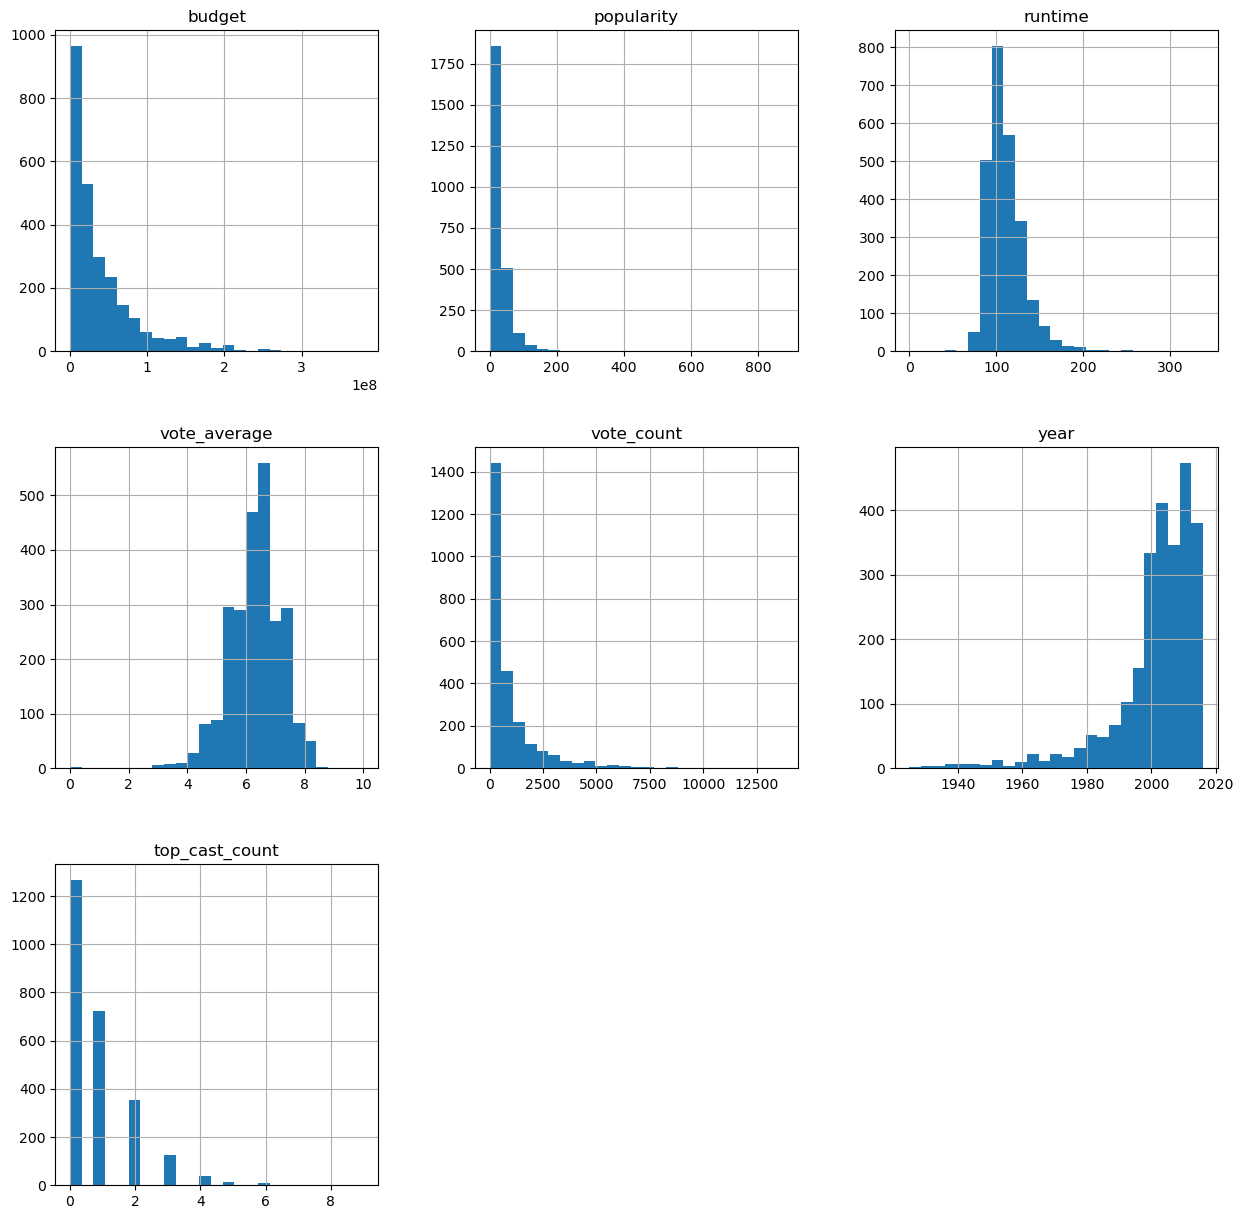

In [49]:
numeric = pd.concat([exploratory.select_dtypes(['int64', 'float64']), notional_to_numeric], axis=1)
numeric.hist(figsize=(15,15), bins=25)

In [50]:
numeric

,budget,popularity,runtime,vote_average,vote_count,year,top_cast_count
226,120000000,11.137655,121.0,4.9,223,2010,2
1211,40000000,14.199933,134.0,6.8,255,2014,0
4090,2000000,17.639478,134.0,7.6,240,1961,0
4183,1700000,13.315383,93.0,5.5,215,1973,0
399,85000000,26.619510,83.0,6.1,656,2006,0
...,...,...,...,...,...,...,...
840,55000000,32.657488,122.0,6.7,658,1998,2
3780,0,4.757625,96.0,6.1,67,2005,1
827,55000000,21.272734,114.0,6.4,529,1998,1
2184,15000000,43.644978,148.0,7.8,3045,2007,1


In [51]:
numeric.corr().style.background_gradient(cmap='RdYlGn')

,budget,popularity,runtime,vote_average,vote_count,year,top_cast_count
budget,1.000000,0.445270,0.225490,-0.037438,0.530669,0.257648,0.310555
popularity,0.445270,1.000000,0.171434,0.274401,0.747246,0.153749,0.173366
runtime,0.225490,0.171434,1.000000,0.362783,0.246968,-0.157391,0.141613
vote_average,-0.037438,0.274401,0.362783,1.000000,0.365945,-0.205726,0.060860
vote_count,0.530669,0.747246,0.246968,0.365945,1.000000,0.158507,0.231378
year,0.257648,0.153749,-0.157391,-0.205726,0.158507,1.000000,0.147969
top_cast_count,0.310555,0.173366,0.141613,0.060860,0.231378,0.147969,1.000000


<Axes: xlabel='popularity', ylabel='vote_count'>

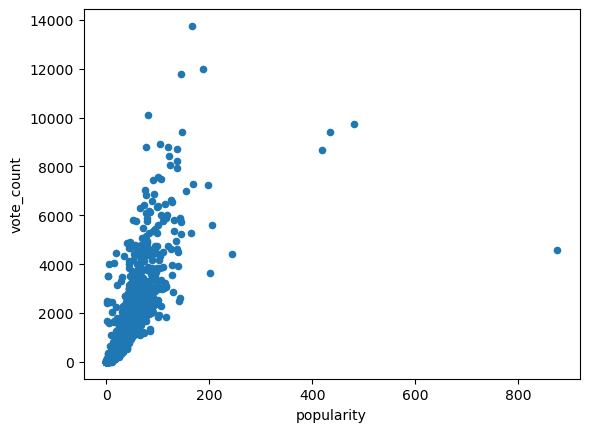

In [52]:
numeric.plot(kind='scatter', x='popularity', y='vote_count') # strongly correlated features

We had to take care of **heteroscedasticity**. Luckily log transformation took care of it. Now we have more or less the same variance of residuals across all values.
We also could notice some outliers. Let's take a look at observations with popularity higher than 400.

<Axes: xlabel='popularity', ylabel='vote_count'>

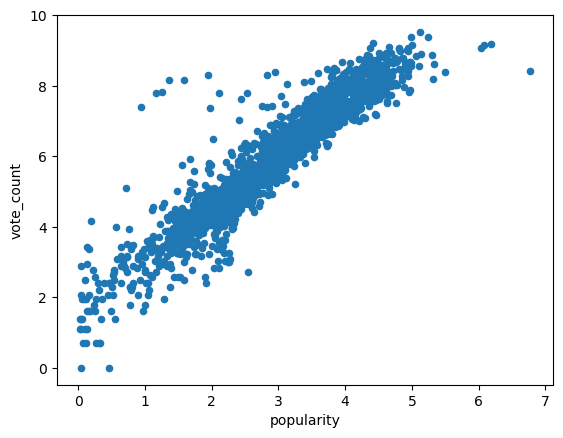

In [53]:
possible_outliers = exploratory[exploratory['popularity'] > 400]

numeric[['popularity', 'vote_count']] = np.log(exploratory[['popularity', 'vote_count']] + 1)
numeric.plot(kind='scatter', x='popularity', y='vote_count')

In [54]:
possible_outliers # huge blockbusters -> nothing to worry about then

,budget,genres,homepage,keywords,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,vote_average,vote_count,cast,crew
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-17,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de..."
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.madmaxmovie.com/,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-05-13,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,7.2,9427,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de..."
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2014-07-30,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,7.9,9742,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de..."
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,6.5,8662,"[{""cast_id"": 10, ""character"": ""Owen Grady"", ""c...","[{""credit_id"": ""52fe4bf7c3a368484e1a0683"", ""de..."


In [55]:
numeric.corr().style.background_gradient(cmap='coolwarm')

,budget,popularity,runtime,vote_average,vote_count,year,top_cast_count
budget,1.000000,0.474375,0.225490,-0.037438,0.491902,0.257648,0.310555
popularity,0.474375,1.000000,0.182647,0.337095,0.935994,0.205023,0.277008
runtime,0.225490,0.182647,1.000000,0.362783,0.190747,-0.157391,0.141613
vote_average,-0.037438,0.337095,0.362783,1.000000,0.371527,-0.205726,0.060860
vote_count,0.491902,0.935994,0.190747,0.371527,1.000000,0.219394,0.294424
year,0.257648,0.205023,-0.157391,-0.205726,0.219394,1.000000,0.147969
top_cast_count,0.310555,0.277008,0.141613,0.060860,0.294424,0.147969,1.000000


In [56]:
class MeanTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, name):
        self.name = name
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.mean(axis=1).to_frame(self.name)

In [57]:
feature_mean = make_pipeline(FeatureSelector(['vote_count', 'popularity']), MeanTransformer('popularity_vote')).fit_transform(exploratory)
feature_mean.head()

,popularity_vote
226,117.068827
1211,134.599966
4090,128.819739
4183,114.157691
399,341.309755


In [58]:
numeric['vote_popularity'] = feature_mean
numeric.drop(columns=['popularity', 'vote_count'], inplace=True)

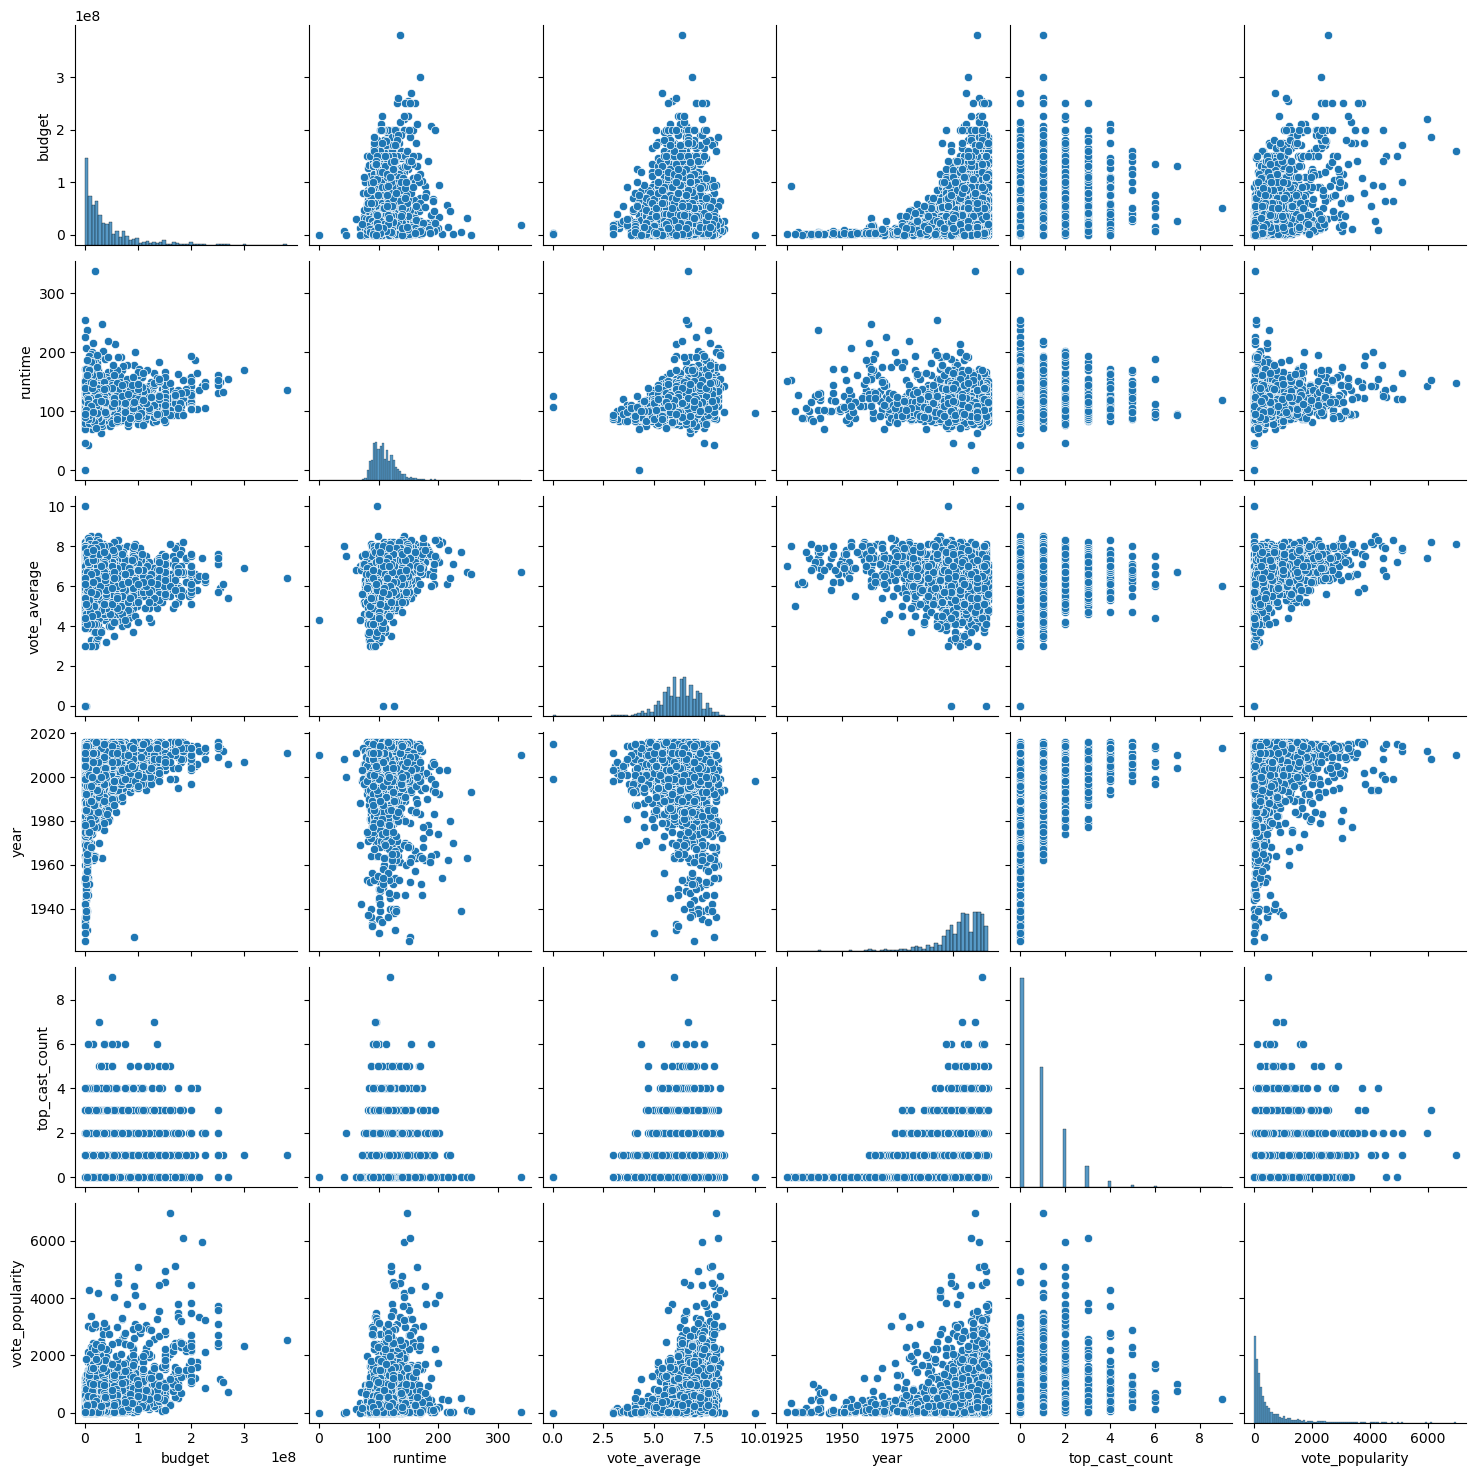

In [59]:
sns.pairplot(numeric)

R2 score - wsp. determinancji:
Informuje o tym, jaka część zmienności (wariancji) zmiennej objaśnianej w próbie pokrywa się z korelacjami ze zmiennymi zawartymi w modelu. Jest on więc miarą stopnia, w jakim model pasuje do próby. Współczynnik determinacji przyjmuje wartości z przedziału jeśli w modelu występuje wyraz wolny, a do estymacji parametrów wykorzystano metodę najmniejszych kwadratów. Jego wartości najczęściej są wyrażane w procentach. Dopasowanie modelu jest tym lepsze, im wartość R² jest bliższa jedności. Wyraża się on wzorem: 
$$R^{2}:={\frac {\sum \limits _{i=1}^{n}({\hat {y}}_{i}-{\overline {y}})^{2}}{\sum \limits _{i=1}^{n}(y_{i}-{\overline {y}})^{2}}}$$


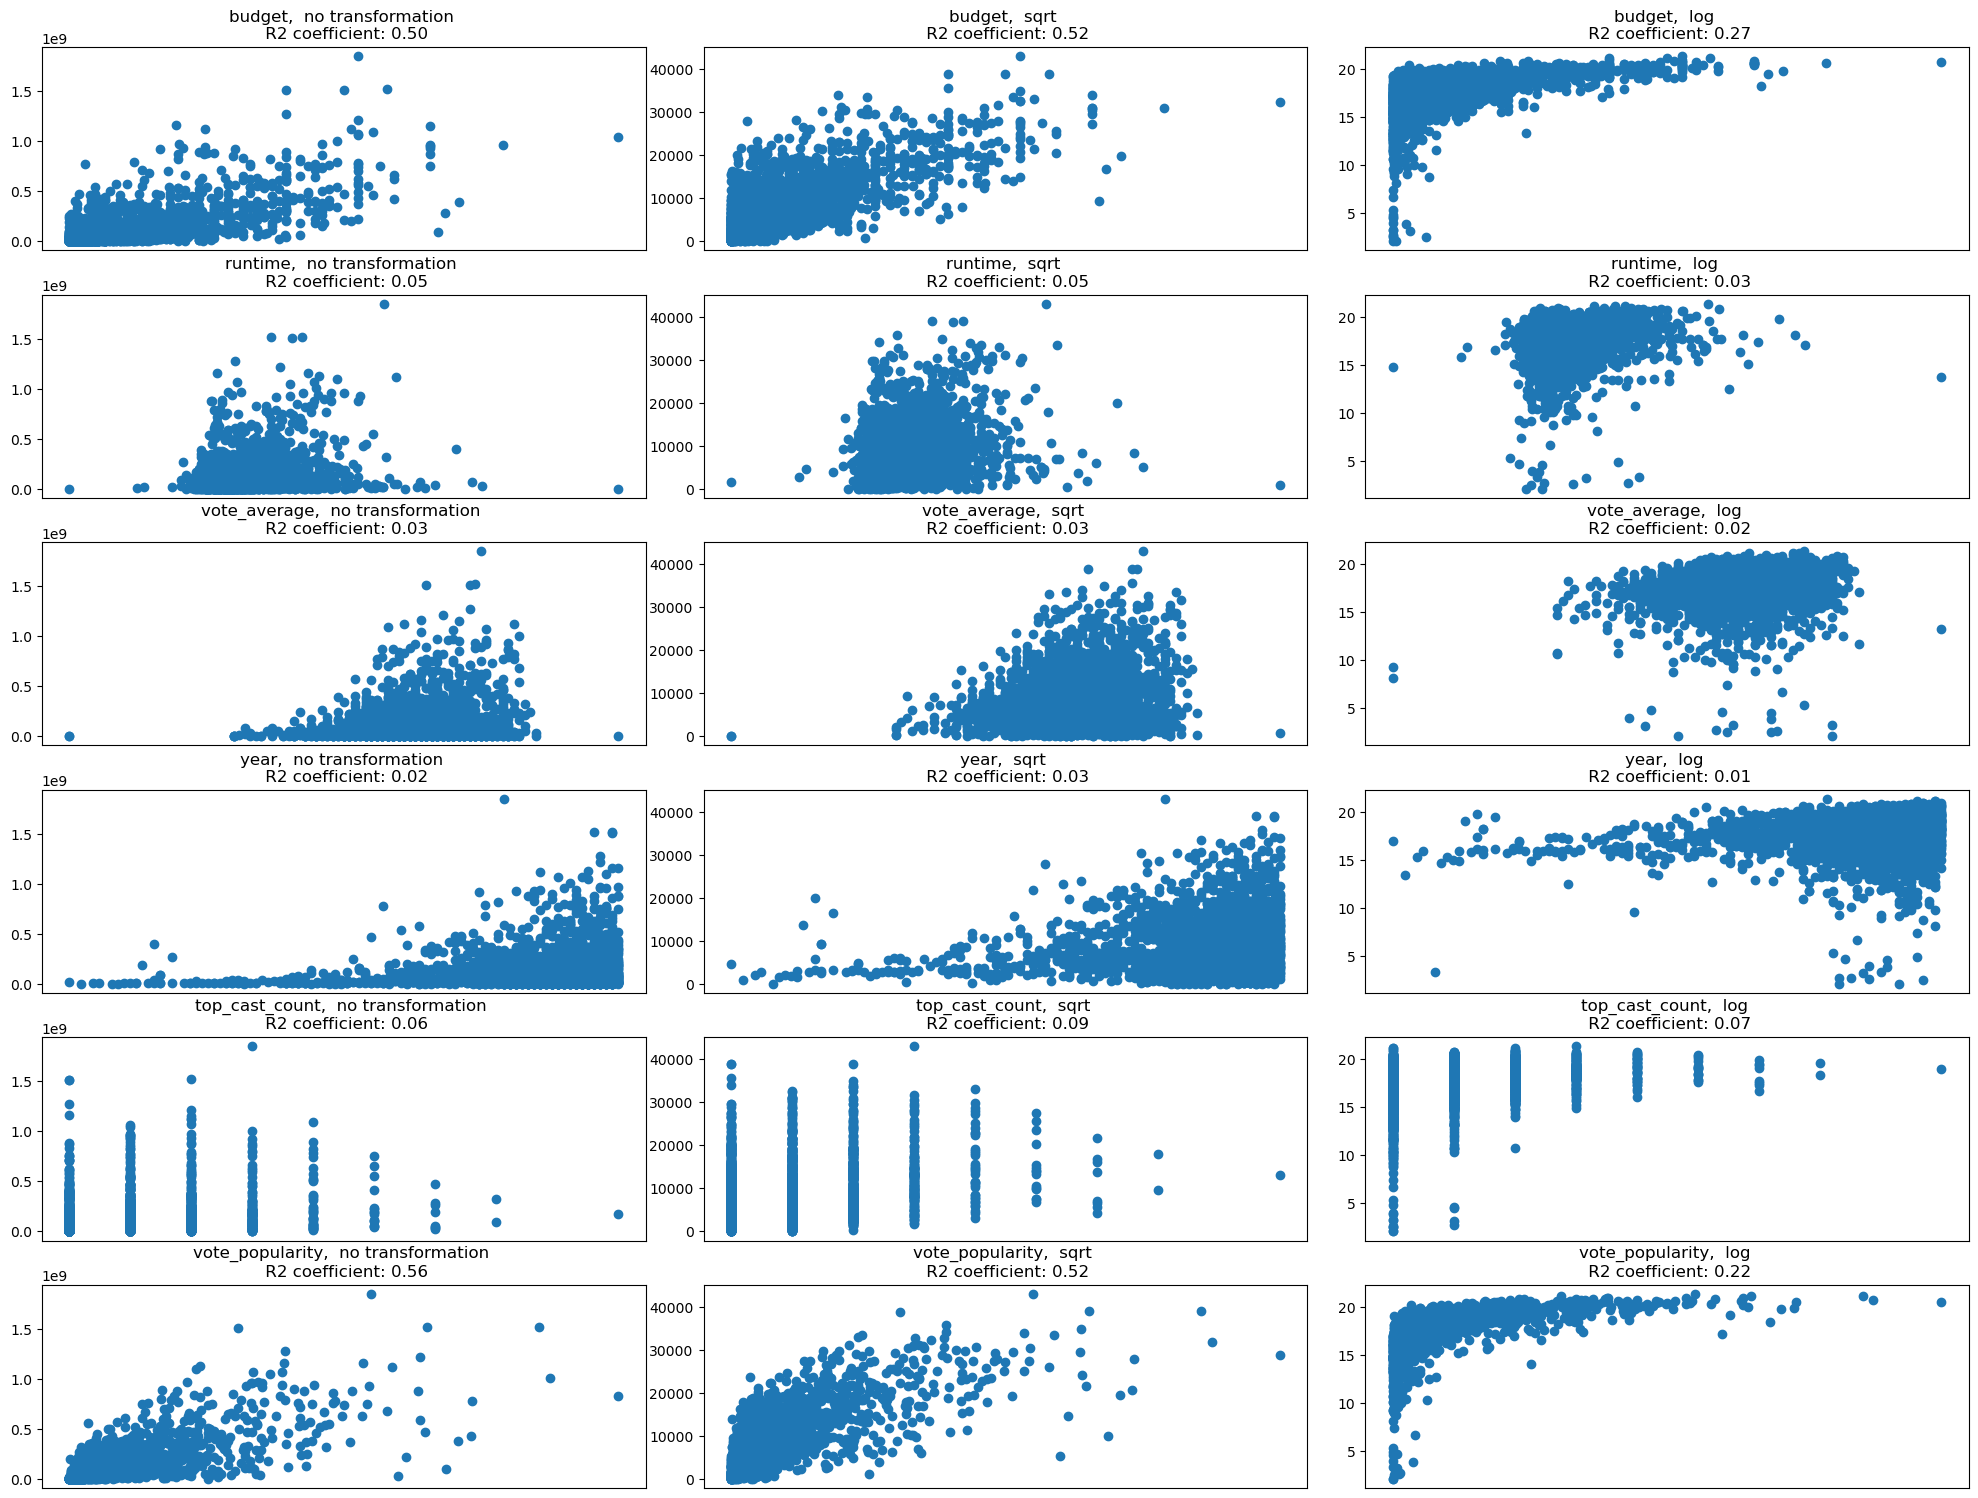

In [60]:
from scipy.stats import pearsonr

transformations = [lambda x: x, np.sqrt, lambda x: np.log(x+1)]
tran_description = [' no transformation', ' sqrt', ' log']
numeric_columns = numeric.columns

fig, axes = plt.subplots(len(numeric_columns), len(transformations), figsize=(20,15))
fig.tight_layout()

for col_idx, col in enumerate(numeric_columns):
    for tran_idx, tran in enumerate(transformations):
        axes[col_idx, tran_idx].scatter(x=numeric[col], y=tran(y_train))
        axes[col_idx, tran_idx].set_xticklabels([])
        axes[col_idx, tran_idx].set_xticks([]) 
        R2 = pearsonr(numeric[col], tran(y_train))[0]**2     
        axes[col_idx, tran_idx].title.set_text(f'{col}, {tran_description[tran_idx]} \n R2 coefficient: {R2:.2f}')
               
plt.show()

In [61]:
# TODO: 
# dokładna analiza tego co do tej pory
# modyfikacja transformerów
# zrobienie pipelinow i unionów
# predykcja z cv

# znalezienie datasetu (age-slownie, height-weight) i wykorzystanie pipe
# zabawa z kodem do innych danych
# sql

# 2. Building a pipeline

In [65]:
from joblib import Parallel, delayed
from sklearn.pipeline import FeatureUnion, _fit_transform_one, _transform_one, _name_estimators
from scipy import sparse

import warnings
warnings.filterwarnings('ignore')

class PandasFeatureUnion(FeatureUnion):
    def fit_transform(self, X, y=None, **fit_params):
        self._validate_transformers()
        result = Parallel(n_jobs=self.n_jobs)(
            delayed(_fit_transform_one)(
                transformer=trans,
                X=X,
                y=y,
                weight=weight,
                **fit_params)
            for name, trans, weight in self._iter())

        if not result:
            # All transformers are None
            return np.zeros((X.shape[0], 0))
        Xs, transformers = zip(*result)
        self._update_transformer_list(transformers)
        if any(sparse.issparse(f) for f in Xs):
            Xs = sparse.hstack(Xs).tocsr()
        else:
            Xs = self.merge_dataframes_by_column(Xs)
        return Xs

    def merge_dataframes_by_column(self, Xs):
        return pd.concat(Xs, axis="columns", copy=False)

    def transform(self, X):
        Xs = Parallel(n_jobs=self.n_jobs)(
            delayed(_transform_one)(
                transformer=trans,
                X=X,
                y=None,
                weight=weight)
            for name, trans, weight in self._iter())
        if not Xs:
            # All transformers are None
            return np.zeros((X.shape[0], 0))
        if any(sparse.issparse(f) for f in Xs):
            Xs = sparse.hstack(Xs).tocsr()
        else:
            Xs = self.merge_dataframes_by_column(Xs)
        return Xs
    
def make_union(*transformers, **kwargs):
    n_jobs = kwargs.pop('n_jobs', None)
    verbose = kwargs.pop('verbose', False)
    if kwargs:
        # We do not currently support `transformer_weights` as we may want to
        # change its type spec in make_union
        raise TypeError('Unknown keyword arguments: "{}"'
                        .format(list(kwargs.keys())[0]))
    return PandasFeatureUnion(
        _name_estimators(transformers), n_jobs=n_jobs, verbose=verbose)


In [63]:
# def make_union(*transformers):
#     return Pand

In [66]:
union = make_union(
    make_pipeline(
        FeatureSelector('genres'),
        DictionaryVectorizer('name')
    ),
    make_pipeline(
        FeatureSelector('homepage'),
        Binarizer(lambda x: isinstance(x, float), 'missing_homepage')
    ),
    make_pipeline(
        FeatureSelector('keywords'),
        DictionaryVectorizer('name'),
        TopFeatures(0.5)
    ),
    make_pipeline(
        FeatureSelector('original_language'),
        Binarizer(lambda x: x == 'en', 'en')
    ),
    make_pipeline(
        FeatureSelector('production_companies'),
        DictionaryVectorizer('name'),
        TopFeatures(1)
    ),
    make_pipeline(
        FeatureSelector('production_countries'),
        DictionaryVectorizer('name'),
        TopFeatures(25)
    ),
    make_pipeline(
        FeatureSelector('release_date'),
        DateTransformer()
    ),
    make_pipeline(
        FeatureSelector('spoken_languages'),
        ItemCounter(),
        Binarizer(lambda x: x > 1, 'multilingual')
    ),
    make_pipeline(
        FeatureSelector('original_language'),
        Binarizer(lambda x: x == 'Released', 'Released')
    ),    
    make_pipeline(
        FeatureSelector('cast'),
        DictionaryVectorizer('name'),
        TopFeatures(0.25),
        SumTransformer('top_cast_count')
    ),
    make_pipeline(
        FeatureSelector('crew'),
        DictionaryVectorizer('name', False),
        TopFeatures(1)
    ),
    make_pipeline(
        FeatureSelector(['budget', 'runtime', 'vote_average'])
    ),
    make_pipeline(
        FeatureSelector(['popularity', 'vote_count']),
        MeanTransformer('popularity_vote')
    )
)

In [67]:
%%time
union.fit(X_train)
print('Fitted')

Fitted
CPU times: user 6.34 s, sys: 99.9 ms, total: 6.44 s
Wall time: 6.45 s


In [68]:
%%time
X_train_T = union.transform(X_train)
X_test_T = union.transform(X_test)

print(X_train_T.shape)
print(X_test_T.shape)

(2534, 145)
(845, 145)
CPU times: user 3.65 s, sys: 113 ms, total: 3.76 s
Wall time: 3.76 s


In [69]:
# little post processing
def handle_same_name_col(df):
    column_names = set()
    for i, column in enumerate(df.columns):
        if column in column_names:
            print("Duplicate found")
            df.columns.values[i] = f'{column}_{i}'
        else:
            column_names.add(column)
    return df

In [70]:
X_train_T = handle_same_name_col(X_train_T)
X_test_T = handle_same_name_col(X_test_T)

Duplicate found
Duplicate found


In [71]:
X_train_T.columns.duplicated().sum()

0

# 3. Building regressor

In [74]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

params = {
    'n_estimators': np.linspace(100, 300, 3).astype(int),
    'max_depth': [3, 4, 5, 6, 7],
}

def generate_regressor(regressor, params):
    cv = 10
    rand = True
    if rand:
        search = RandomizedSearchCV(regressor, param_distributions=params, cv=cv)
    else:
        search = GridSearchCV(regressor, param_grid=params, cv=cv)               
    return search

# xgb_search = generate_regressor(XGBRegressor(verbosity=0), params)
lgb_search = generate_regressor(LGBMRegressor(verbose=-1), params)
ctb_search = generate_regressor(CatBoostRegressor(verbose=0), params)

# xgb_search.fit(X_train_T, y_train)
lgb_search.fit(X_train_T, y_train)
ctb_search.fit(X_train_T, y_train)

# xgb_best = xgb_search.best_estimator_
lgb_best = lgb_search.best_estimator_
ctb_best = ctb_search.best_estimator_

# lgb_params = lgb_search.best_params_
# ctb_params = ctb_search.best_params_
# estimators = [('lgb', LGBMRegressor(**lgb_params, verbose=0)), 
#               ('catboost', CatBoostRegressor(**ctb_params, verbose=0))]

estimators = [('lgb', lgb_best),
             ('ctb', ctb_best)]
ensemble = StackingRegressor(estimators, final_estimator=RidgeCV())
ensemble.fit(X_train_T, y_train)

y_hat = ensemble.predict(X_test_T)

CPU times: user 6min 16s, sys: 53.4 s, total: 7min 10s
Wall time: 47.5 s


In [75]:
r2_score(y_hat, y_test), mean_absolute_error(y_hat, y_test)

(-0.0002547072964422803, 821822456352.8734)

In [76]:
y_hat = lgb_best.predict(X_test_T)
r2_score(y_hat, y_test), mean_absolute_error(y_hat, y_test)

(0.6735115598515704, 48011449.776297405)

In [77]:
y_hat = ctb_best.predict(X_test_T)
r2_score(y_hat, y_test), mean_absolute_error(y_hat, y_test)

(0.6517775455077202, 47934883.46527672)

In [ ]:
# this is bad xd

In [ ]:
# y_hat = xgb_best.predict(X_test_T)
# r2_score(y_hat, y_test), mean_absolute_error(y_hat, y_test)
# r2, mae
# l = LGBMRegressor(lgb_p)
# l.fit(X_train_T, y_train)
# y_hat = l.predict(X_test_T)
# r2_score(y_hat, y_test), mean_absolute_error(y_hat, y_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV # super basic fine-tuning

params_r = {
    'n_estimators': np.linspace(100, 300, 3).astype(int),
    'max_depth': [3, 4, 5, 6, 7],  # Maximum tree depth
    'learning_rate': [0.01, 0.05, 0.1, 0.3],  # Learning rate
    'subsample': [0.5, 0.7, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.5, 1.0],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1.0],  # L2 regularization term on weights
}

params_g = {
    'n_estimators': np.linspace(100, 300, 3).astype(int),
    'max_depth': [3, 4, 5, 6, 7],  # Maximum tree depth
    'learning_rate': [0.01, 0.05, 0.1, 0.3],  # Learning rate
}

params_c = {}


# search = RandomizedSearchCV(XGBRegressor(random_state=42), params_r, cv=10)
# search = GridSearchCV(XGBRegressor(random_state=42), params_g, cv=10)
# search = RandomizedSearchCV(LGBMRegressor(random_state=42), params_r, cv=10)
search = CatBoostRegressor()

In [ ]:
search.fit(X_train_T, y_train, verbose=0)

In [ ]:
%%time
search.fit(X_train_T, y_train, verbose=0)

In [ ]:
y_hat = search.predict(X_test_T)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_hat, y_test)
mae = mean_absolute_error(y_hat, y_test)
r2, mae, mse

In [ ]:
import matplotlib.pyplot as plt

N = 20
x = np.arange(y_hat.shape[0])[:N]
plt.figure(figsize=(10,10))
plt.scatter(x, y_hat[:N], label='prediction')
plt.scatter(x, y_test[:N], label='truth')
# for i in range(N):
    # plt.vlines(x[i], y_hat[i], y_test[i], color='red', linestyle='dashed', linewidth=1)

plt.xticks(visible=False)
plt.legend()
plt.show()